### Step 1: Look at the big picture

##### Design consideration in problem framing
- Supervised, Unsupervised, Reinforced Learning
- Classification, Regression, Other
- Single, Multiple outputs
- Continuous Learning, Periodic Updates
- Batch, Online

##### Selection of performance measure
- Regression: MSE, MAE
- Classification: Precision, Recall, F1-Score, Accuracy

##### Check the assumptions
- Review with domain experts

### Step 2: Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]
print ("Feature list:", feature_list)
print ("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

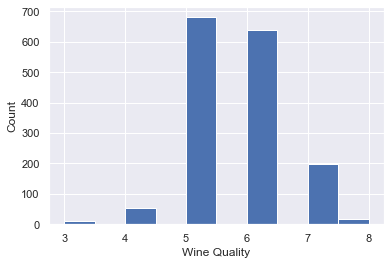

In [8]:
sns.set()
data['quality'].hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

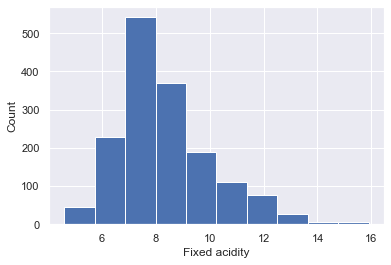

In [9]:
data['fixed acidity'].hist()
plt.xlabel('Fixed acidity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

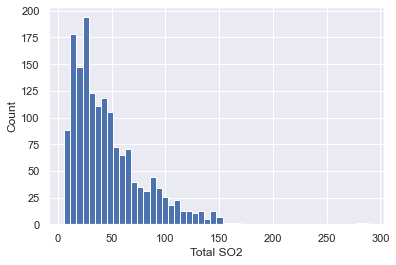

In [10]:
data['total sulfur dioxide'].hist(bins=50)
plt.xlabel('Total SO2')
plt.ylabel('Count')

In [11]:
def split_train_test(data, test_ratio):
 np.random.seed(42)
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_data, test_data = split_train_test(data, 0.2)

##### Alternatively...use the library sklearn

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.2, random_state=42)

In [14]:
random_dist = test_data["quality"].value_counts() / len(test_data)

In [15]:
total_dist = data['quality'].value_counts() / len(data)

In [16]:
dist_comparison_random = pd.DataFrame({'overall': total_dist, 'random': random_dist})

In [17]:
dist_comparison_random['diff_random'] = (total_dist - random_dist)

In [18]:
dist_comparison_random['diff_pc_random'] = 100 * (total_dist - random_dist)/total_dist

In [19]:
dist_comparison_random

,overall,random,diff_random,diff_pc_random
3,0.006254,0.003125,0.003129,50.031250
4,0.033146,0.031250,0.001896,5.719340
5,0.425891,0.406250,0.019641,4.611784
6,0.398999,0.412500,-0.013501,-3.383621
7,0.124453,0.131250,-0.006797,-5.461683
8,0.011257,0.015625,-0.004368,-38.802083


##### Stratified sampling (as per distribution)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [21]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set) 

In [22]:
total_dist = data['quality'].value_counts() / len(data)

In [23]:
dist_comparison = pd.DataFrame({'overall': total_dist, 'stratified': strat_dist})

In [24]:
dist_comparison['diff_stratified'] = (total_dist - strat_dist)

In [25]:
dist_comparison['diff_pc_stratified'] = 100 * (total_dist - strat_dist)/total_dist

In [26]:
dist_comparison

,overall,stratified,diff_stratified,diff_pc_stratified
5,0.425891,0.425000,0.000891,0.209251
6,0.398999,0.400000,-0.001001,-0.250784
7,0.124453,0.125000,-0.000547,-0.439698
4,0.033146,0.034375,-0.001229,-3.708726
8,0.011257,0.009375,0.001882,16.718750
3,0.006254,0.006250,0.000004,0.062500


##### Comparing random and stratified sampling.

In [27]:
dist_comparison.insert(1, 'random', dist_comparison_random['random'])
dist_comparison.insert(3, 'diff_random', dist_comparison_random['diff_random'])
dist_comparison.insert(6, 'diff_pc_random', dist_comparison_random['diff_pc_random'])

In [28]:
dist_comparison

,overall,random,stratified,diff_random,diff_stratified,diff_pc_stratified,diff_pc_random
5,0.425891,0.406250,0.425000,0.019641,0.000891,0.209251,4.611784
6,0.398999,0.412500,0.400000,-0.013501,-0.001001,-0.250784,-3.383621
7,0.124453,0.131250,0.125000,-0.006797,-0.000547,-0.439698,-5.461683
4,0.033146,0.031250,0.034375,0.001896,-0.001229,-3.708726,5.719340
8,0.011257,0.015625,0.009375,-0.004368,0.001882,16.718750,-38.802083
3,0.006254,0.003125,0.006250,0.003129,0.000004,0.062500,50.031250


### Step 3: Data visualization

In [29]:
exploration_set = strat_train_set.copy()

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

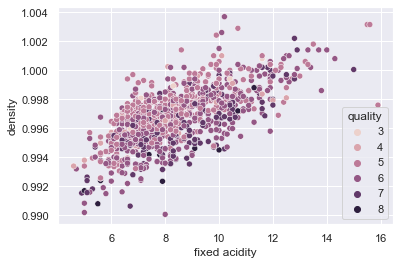

In [30]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

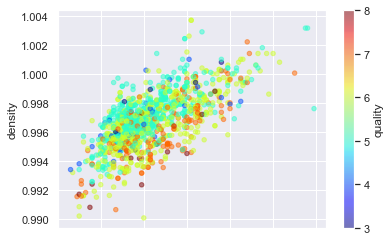

In [31]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

##### Correlation between features

In [32]:
corr_matrix = exploration_set.corr()

In [33]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

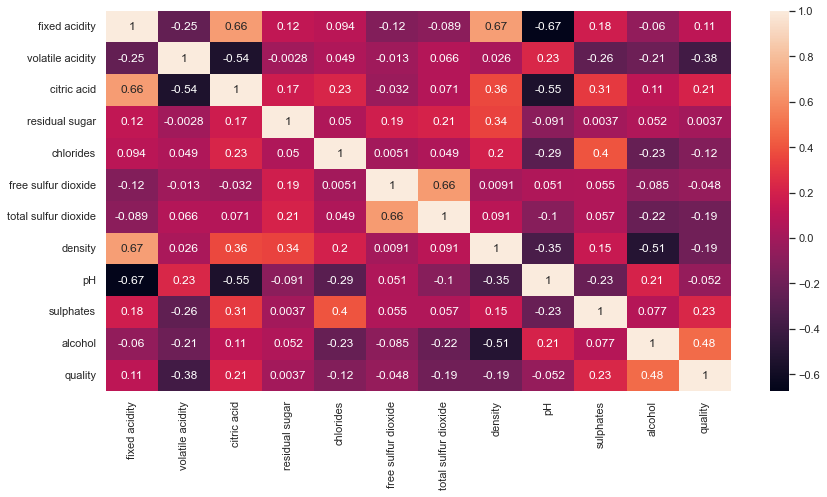

In [34]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

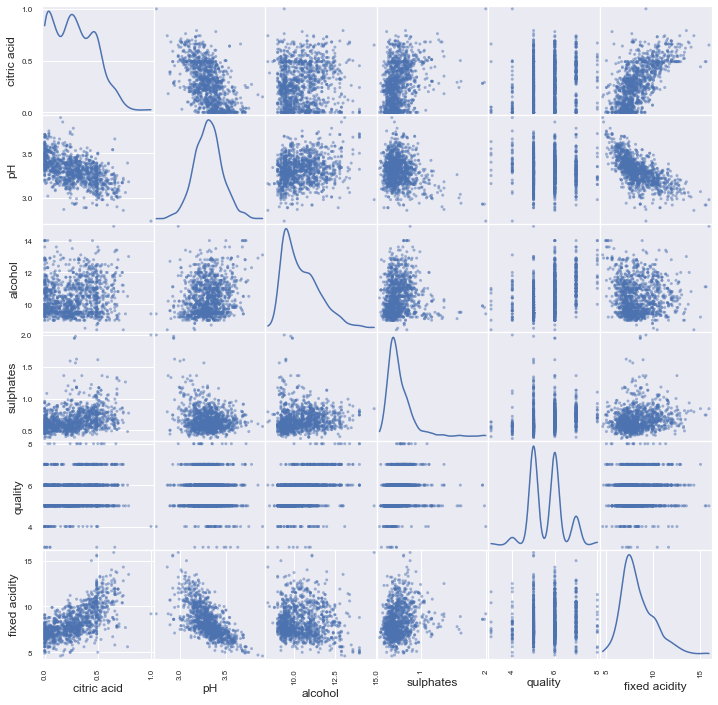

In [35]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality', 'fixed acidity']
#semi-colon at the end of the below statement is used to ignore the text in the output.
scatter_matrix(exploration_set[attribute_list], figsize=(12, 12), diagonal='kde', alpha=0.5);

### Step 4: Prepare data for ML algorithm

##### Imputing

In [36]:
#Forcing all rows with free sulfur dioxide less than 5 to NA, and we'll impute those values to median later.
strat_train_set.loc[strat_train_set['free sulfur dioxide'] < 5, 'free sulfur dioxide'] = None
strat_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,NaN,10.0,0.99586,3.21,0.59,12.10,7
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,5
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,5
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,5


In [37]:
wine_features = strat_train_set.drop("quality", axis=1)
wine_labels = strat_train_set['quality'].copy()

In [38]:
wine_features.isna().sum() # you may use dropna() from sklearn to drop missing values

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide     68
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 15.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [41]:
wine_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,NaN,10.0,0.99586,3.21,0.59,12.10
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [42]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     15.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [43]:
tr_features = imputer.transform(wine_features)

In [44]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

In [45]:
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,15.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [46]:
wine_features_tr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.306489,0.528073,0.273878,2.543589,0.088934,16.747068,47.280688,0.996735,3.308585,0.663675,10.424446
std,1.695325,0.177710,0.194902,1.375697,0.050981,10.033587,33.334786,0.001852,0.151599,0.178360,1.065672
min,4.600000,0.120000,0.000000,0.900000,0.012000,5.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.395000,0.100000,1.900000,0.070000,9.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,15.000000,39.000000,0.996750,3.310000,0.620000,10.200000
75%,9.300000,0.635000,0.430000,2.600000,0.091000,22.000000,64.000000,0.997800,3.400000,0.740000,11.100000
max,15.900000,1.580000,1.000000,15.400000,0.611000,68.000000,289.000000,1.003690,3.900000,2.000000,14.900000


##### Oridinal encoding for categorical features

In [47]:
# When the data is one-hot encoded, there're as many columns in the encoded form as there are unique values in the data (including None)
data = pd.DataFrame([['One', 'Two', 'Three'],['January', 'February', 'March'],['January', 'Two', 'Three','Four'],['One', 'February', 'March', 'April']])
data

,0,1,2,3
0,One,Two,Three,None
1,January,February,March,None
2,January,Two,Three,Four
3,One,February,March,April


In [48]:
#Let's one-hot encode this.
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
ord_encoder = OrdinalEncoder()

In [49]:
ord = ord_encoder.fit_transform(data)
print(ord)

[[1. 1. 1. 2.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]


In [50]:
ord_encoder.categories_

[array(['January', 'One'], dtype=object),
 array(['February', 'Two'], dtype=object),
 array(['March', 'Three'], dtype=object),
 array(['April', 'Four', None], dtype=object)]

##### One-hot encoding for categorical features

In [51]:
# When the data is one-hot encoded, there're as many columns in the encoded form as there are unique values in the data (including None)
data = pd.DataFrame([['One', 'Two', 'Three'],['January', 'February', 'March'],['January', 'Two', 'Three','Four'],['One', 'February', 'March', 'April']])
data

,0,1,2,3
0,One,Two,Three,None
1,January,February,March,None
2,January,Two,Three,Four
3,One,February,March,April


In [52]:
#Let's one-hot encode this.
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False) # By default, OneHotEncoder produces a sparse matrix.

In [53]:
one_hot = cat_encoder.fit_transform(data)
print(one_hot)

[[0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0.]]


In [54]:
cat_encoder.categories_

[array(['January', 'One'], dtype=object),
 array(['February', 'Two'], dtype=object),
 array(['March', 'Three'], dtype=object),
 array(['April', 'Four', None], dtype=object)]

##### One-hot encoding for mixed (numerical and categorical) features

In [55]:
# Add a new column called place_of_manufacturing to the wine_features_tr; there must be 1279 rows.
d1 = pd.DataFrame(['Delhi', 'Mumbai','Calcutta','Chennai', 'Cochin', 'Bangalore'] * 200)
d2 = pd.DataFrame(['Trivandrum'] * 79)
df = pd.concat([d1, d2])
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(inplace = True)

In [56]:
wine_features_modified = wine_features_tr.copy()
wine_features_modified['place_of_manufacturing'] = df.loc[:,0]
wine_features_modified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,place_of_manufacturing
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,Chennai
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,Cochin
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,Chennai
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,Chennai
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,15.0,10.0,0.99586,3.21,0.59,12.10,Trivandrum
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,Chennai
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,Bangalore
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,Cochin


In [57]:
# Use ColumnTransformer to transform mixed features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]

In [58]:
# t = [("num", MinMaxScaler(), num_attribs), ("cat", OneHotEncoder(sparse=False), cat_attribs)]
t = [("num", StandardScaler(), num_attribs), ("cat", OneHotEncoder(sparse=False), cat_attribs)] # scale as Standard normal distribution
full_pipeline = ColumnTransformer(transformers=t)
wine_features_modified_encoded = full_pipeline.fit_transform(wine_features_modified)

In [59]:
wine_features_modified_encoded

array([[-0.94797009,  1.84038456, -1.30310213, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8299525 ,  0.57378326,  0.28806218, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.12048734,  0.23602292,  1.16063616, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.70742577, -0.15803082,  2.3925053 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.        ,
         0.        ,  0.        ]])

##### Transformation pipelines (Imputing + Feature scaling)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),])
wine_features_tr_pipeline = transform_pipeline.fit_transform(wine_features)

In [61]:
wine_features_tr_pipeline

array([[-0.94797009,  1.84038456, -1.30310213, ..., -0.05665069,
        -0.58149257,  0.30561112],
       [-0.8299525 ,  0.57378326,  0.28806218, ..., -0.58456494,
        -0.58149257, -0.86781667],
       [ 2.12048734,  0.23602292,  1.16063616, ..., -1.24445776,
         0.65244695,  0.258674  ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.00933859,
        -0.13278729, -0.11682289],
       [ 1.70742577, -0.15803082,  2.3925053 , ..., -0.58456494,
        -0.24496361,  0.72804512],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.14131716,
         0.59635879,  1.4790389 ]])

### Step 5: Select and train ML model

#### Fit Linear Regression model

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [63]:
# Evaluate performance on training set
from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.42171131283453567

In [64]:
# Evaluating performance on test set
wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19.4409851469697

Text(0, 0.5, 'Predicted quality')

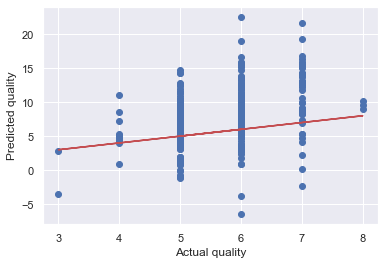

In [65]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

#### Fit DecisionTreeRegressor model

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [67]:
# Evaluate performance on training set
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [68]:
# Evaluate performance on test set
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


2.7

Text(0, 0.5, 'Predicted quality')

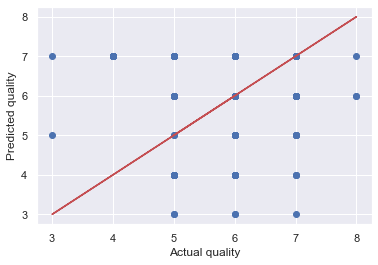

In [69]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

#### Fit RandomForest model

In [70]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

RandomForestRegressor()

In [71]:
# Evaluate performance on training set
quality_predictions = forest_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.047897028928850664

In [72]:
# Evaluate performance on test set
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9390809375

Text(0, 0.5, 'Predicted quality')

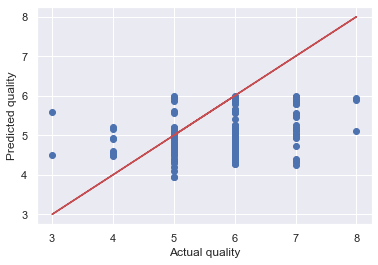

In [73]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

##### Cross-validation

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10) #cv = numbers of folds
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56714795 0.446297   0.38471796 0.40191021 0.29642628 0.37448136
 0.33119765 0.50389428 0.51728769 0.50512625]
Mean: 0.43284866150842277
Standard deviation: 0.0844056409376086


In [76]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.703125   0.7109375  0.5703125  0.578125   0.4609375  0.53125
 0.671875   0.6484375  0.7734375  0.93700787]
Mean: 0.6585445374015748
Standard deviation: 0.12855316068040504


In [77]:
scores = cross_val_score(forest_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.36737656 0.42375391 0.30029062 0.32613125 0.22310781 0.29606484
 0.26544609 0.39777734 0.4465625  0.45432913]
Mean: 0.35008400713582677
Standard deviation: 0.07578509271154026


### Step 6: Finetune your model

##### Grid search for RandomForest model

In [78]:
from sklearn.model_selection import GridSearchCV
# RandomForest has two hyper-parameters: n_estimators (number of classifiers) and max_features (number of features)
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [79]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) # refit has a default value of True
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.47613936546840946 {'max_features': 2, 'n_estimators': 3}
0.3868816176470588 {'max_features': 2, 'n_estimators': 10}
0.36297800925925927 {'max_features': 2, 'n_estimators': 30}
0.47302457788671015 {'max_features': 4, 'n_estimators': 3}
0.38654206495098037 {'max_features': 4, 'n_estimators': 10}
0.3605677900326797 {'max_features': 4, 'n_estimators': 30}
0.48488494008714583 {'max_features': 6, 'n_estimators': 3}
0.38556007965686273 {'max_features': 6, 'n_estimators': 10}
0.3596360940904139 {'max_features': 6, 'n_estimators': 30}
0.48257352941176473 {'max_features': 8, 'n_estimators': 3}
0.382519975490196 {'max_features': 8, 'n_estimators': 10}
0.36019365127995645 {'max_features': 8, 'n_estimators': 30}
0.475293436819172 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.38850269607843135 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4497511574074074 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.38451629901960777 {'bootstrap': False, 'max_features

In [81]:
grid_search.best_params_ # best parameters corresponds to the lowest MSE

{'max_features': 6, 'n_estimators': 30}

In [82]:
grid_search.best_estimator_ # best estimator corresponds to the lowest MSE

RandomForestRegressor(max_features=6, n_estimators=30)

##### Randomized Search for RandomForest model.

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) # refit has a default value of True
rand_search.fit(wine_features_tr, wine_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.44964256535947705 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
0.4705068763616557 {'n_estimators': 3, 'max_features': 4}
0.39864522058823526 {'n_estimators': 10, 'max_features': 6}
0.3849390318627451 {'n_estimators': 10, 'max_features': 2}
0.4768664896514162 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
0.3776465073529412 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
0.3959195772058823 {'n_estimators': 10, 'max_features': 8}
0.360077818627451 {'n_estimators': 30, 'max_features': 8}
0.3566980392156862 {'n_estimators': 30, 'max_features': 2}
0.3561829350490196 {'n_estimators': 30, 'max_features': 4}


In [86]:
rand_search.best_params_ # best parameters corresponds to the lowest MSE

{'n_estimators': 30, 'max_features': 4}

In [87]:
rand_search.best_estimator_ # best estimator corresponds to the lowest MSE

RandomForestRegressor(max_features=4, n_estimators=30)

##### Analysis of best model and its errors

In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.20406366727815506, 'alcohol'),
 (0.1536458003636355, 'sulphates'),
 (0.1280692734621944, 'volatile acidity'),
 (0.0895664489095916, 'density'),
 (0.08740852809447626, 'total sulfur dioxide'),
 (0.06318288110518654, 'fixed acidity'),
 (0.0618337401777715, 'residual sugar'),
 (0.06046633077755736, 'pH'),
 (0.057471644704108434, 'chlorides'),
 (0.052067092149762045, 'citric acid'),
 (0.042224592977561336, 'free sulfur dioxide')]

Based on this information, we may drop features that are not so important.  It is also useful to analyze the errors in prediction and understand its causes and fix them

##### Evaluation on test set

In [89]:
wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

In [90]:
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [91]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.6709513888888889

In [92]:
# To find the 95% confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))

(0.557576041087953, 0.7843267366898253)